# KELOMPOK 1

1.   ARI SANDY KURNIAWAN
2.   M. IHWANUL IQBAL
3.   NUUR AINII KARTIKA PUTRI



# **PERKENALAN**
*   Latar Belakang

Perkembangan teknologi yang begitu pesat pada era saat ini mengubah gaya hidup masyarakat dunia berbasis teknologi. Hadirnya teknologi internet memudahkan pekerjaan masyarakat dalam banyak hal tak terkecuali mobilitas perjalanan. Meningkatnya akses internet melalui smartphone mengundang hadirnya transportasi online. 
Transportasi online hadir sebagai layanan yang memudahkan masyarakat dalam melakukan mobilitas perjalanan. Hanya dengan smartphone serta layanan internet yang tersedia, masyarakat akan dengan mudah memesan layanan transportasi dimanapun dan kapanpun. 
Beberapa perusahaan transportasi online yang ada di antaranya yaitu Uber dan Lyft. Karena maraknya jenis transportasi online yang ada, tentunya akan menyulitkan pengguna untuk menentukan jenis transportasi online mana yang lebih baik untuk digunakan. Untuk itu, dalam penelitian kali ini akan menganalisis faktor-fakto yang mempengaruhi harga dari jenis transportasi online yang ada.
*   Data Yang Digunakan

Data yang digunakan dalam penelitian kali ini adalah data uber vs lyft, dengan variabel dependen (y) adalah price dan variabel independen (x) yang digunakan untuk adalah cab type, name, distance dan surge multiplier.
*   Objective Yang Ingin Dicapai

Objective yang ingin dicapai dalam penelitian kali adalah analisis faktor-faktor yang mempengaruhi harga uber vs lyft dengan menggunakan model linear regression serta mempredeksi harga uber vs lyft dengan model yang sudah dibuat

# **PUSTAKA YANG DIBUTUHKAN**

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib
import pickle

#  **DATA LOADING**

In [3]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# **DATA CLEANING**

## Melihat Missing Value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
df.shape

(693071, 57)

> Setelah melihat menggunakan .info, menunjukkan bahwa tidak terdapat missing value tertulis yaitu "0 to 693070".

In [6]:
#df.isnull()

In [7]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [8]:
df.isnull().sum().sum()

55095

> Pada sebelumnya tidak ditemukan missing value, namun ternyata setelah dianalsisi lebih jauh terdapat missing value pada bagian price sebanyak 55095, langkah selanjutnya adalah penanganan missing value menggunakan salah satu metode yaitu menggantinya dengan nilai median dari variablenya.

In [9]:
df['price'].fillna(df['price'].median(), inplace=True)

In [10]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

> Setelah dilakukan penanganan missing value pada dataset maka langkah selanjutnya adalah pengecekan mengenai duplikasi data.

## Melihat Duplikasi Data

In [11]:
#dup = df.duplicated()
#print(dup)

In [12]:
#print(dup.any())

> Tidak terdapat duplikasi data pada dataset.

# **EKSPLORASI DATA**

In [13]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.303056,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,8.983913,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.500000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

##  Price Analysis

In [14]:
# Melihat rata-rata harga berdasarkan route asal dan destinasi atau tujuan
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        13.996343
                        Fenway                   13.646161
                        Haymarket Square         17.629047
                        North End                18.999267
                        Northeastern University  13.178676
                        South Station            17.368166
Beacon Hill             Boston University        16.148395
                        Fenway                   15.948071
                        Haymarket Square         13.775246
                        North End                15.129993
                        Northeastern University  16.236111
                        South Station            15.756028
Boston University       Back Bay                 13.953471
                        Beacon Hill              17.012859
                        Financial District       23.300844
                        North Station            19.656435
                        Theatre District         18.276663
                        West End                 18.204098
Fenway                  Back Bay                 13.778176
                        Beacon Hill              16.535343
                        Financial District       22.653445
                        North Station            19.205107
                        Theatre District         17.854022
                        West End                 17.792622
Financial District      Boston University        24.545824
                        Fenway                   22.621248
                        Haymarket Square         13.212948
                        North End                13.205054
                        Northeastern University  21.254856
                        South Station            12.440012
Haymarket Square        Back Bay                 16.592140
                        Beacon Hill              13.351453
                        Financial District       12.792579
                        North Station            12.424642
                        Theatre District         13.663261
                        West End                 12.607416
North End               Back Bay                 19.071002
                        Beacon Hill              15.785038
                        Financial District       13.424135
                        North Station            12.877680
                        Theatre District         15.035328
                        West End                 13.495278
North Station           Boston University        18.501846
                        Fenway                   18.143319
                        Haymarket Square         12.645058
                        North End                13.137830
                        Northeastern University  19.054396
                        South Station            15.225016
Northeastern University Back Bay                 13.683161
                        Beacon Hill              16.576832
                        Financial District       21.865632
                        North Station            19.397613
                        Theatre District         15.933637
                        West End                 17.829995
South Station           Back Bay                 18.660729
                        Beacon Hill              16.976420
                        Financial District       12.520914
                        North Station            15.567792
                        Theatre District         13.916505
                        West End                 15.690529
Theatre District        Boston University        19.814755
                        Fenway                   18.623904
                        Haymarket Square         15.069994
                        North End                15.026191
                        Northeastern University  16.638428
                        South Station            12.937634
West End                Boston University 

In [15]:
# Melihat harga maksimum didalam dataset serta nomor baris yang mencantumkan harga tertinggi
print('Harga Maksimum di dalam dataset :',df.price.max())
df[df['price']==df.price.max()]

Harga Maksimum di dalam dataset : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


> Pada code sebelumnya terlihat bahwa harga tertinggi yaitu berada pada source Financial District dan destination Fenway yaitu 97.5, namun melihat dari tabel source dan destination yang diurutkan berdasarkan mean atau average itu hanya dikisaran 23.4, dimana hal tersebut sangat jauh antara harga maksimal dengan rata-rata yang didapatkan. Hal ini membuat bahwa harga tertinggi bisa dikategorikan sebagai outlier.

In [16]:
# Plotting map menggunakan folium untuk mengetahui letak atau jarak destinasi dari financial district - fenway
# Destinasi route dibuat dengan data dari latitude dan longitude
route_fd_f = folium.Map(location=(42.3503,-71.081),zoom_start = 14)
folium.Marker(location=(42.3503,-71.081)).add_to(route_fd_f) # Fenway
folium.Marker(location=(42.3378,-71.066)).add_to(route_fd_f) # Financial District
display(route_fd_f)

#  **DATA PREPROCESSING**

## **Mengecek Korelasi Dari Fitur Yang Berkaitan Dengan Price**

### **Time and Location With Price**

In [17]:
time_col = ['hour','day','month','latitude','longitude','price']

In [18]:
df_time = df[time_col]
df_time.head()

,hour,day,month,latitude,longitude,price
0,9,16,12,42.2148,-71.033,5.0
1,2,27,11,42.2148,-71.033,11.0
2,1,28,11,42.2148,-71.033,7.0
3,4,30,11,42.2148,-71.033,26.0
4,3,29,11,42.2148,-71.033,9.0


<AxesSubplot:>

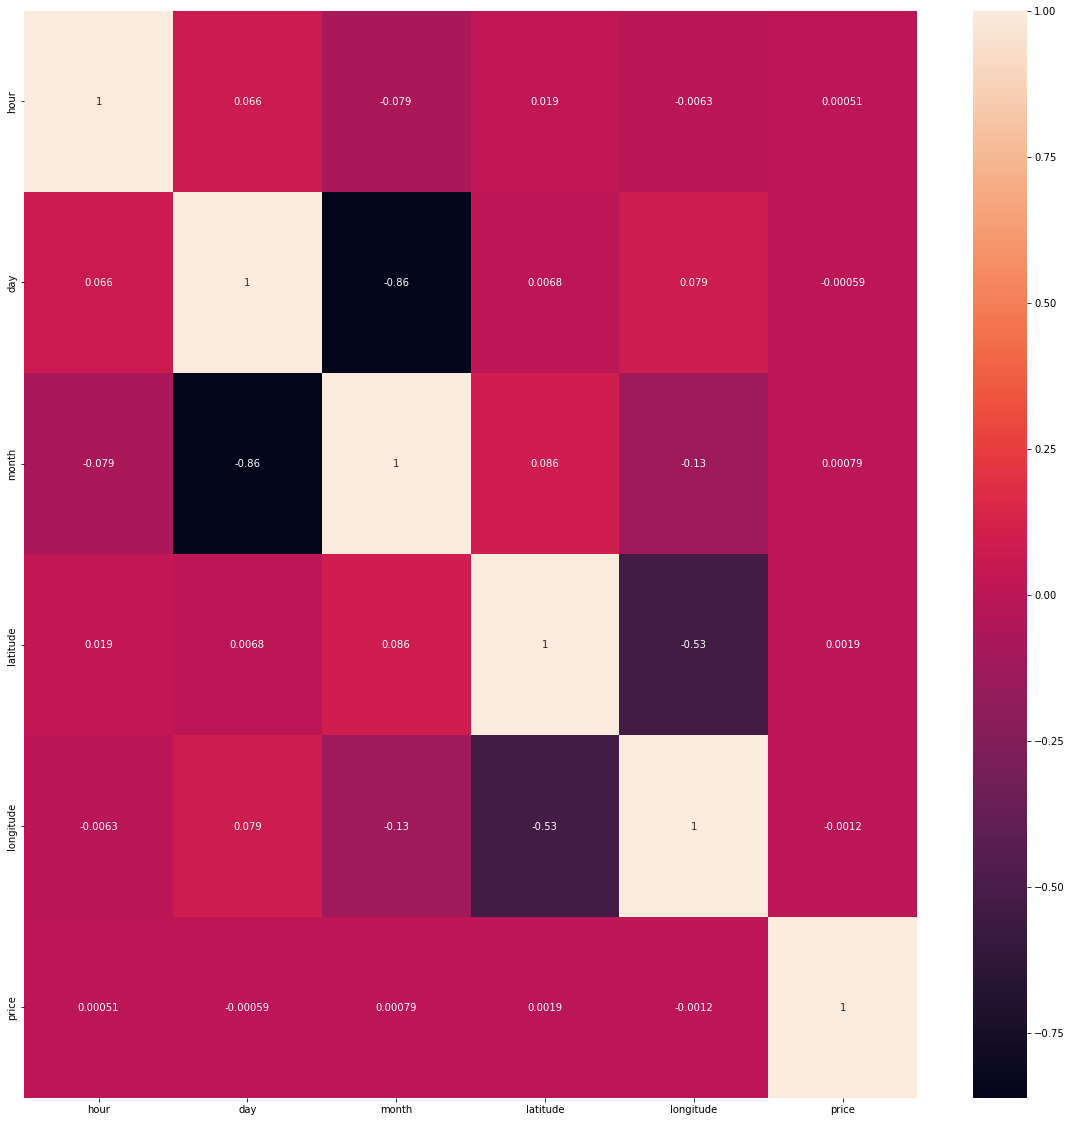

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df_time.corr(),annot=True)

###  **Climate With Price**

In [20]:
climate_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']

In [21]:
df_climate = df[climate_col]
df_climate.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot:>

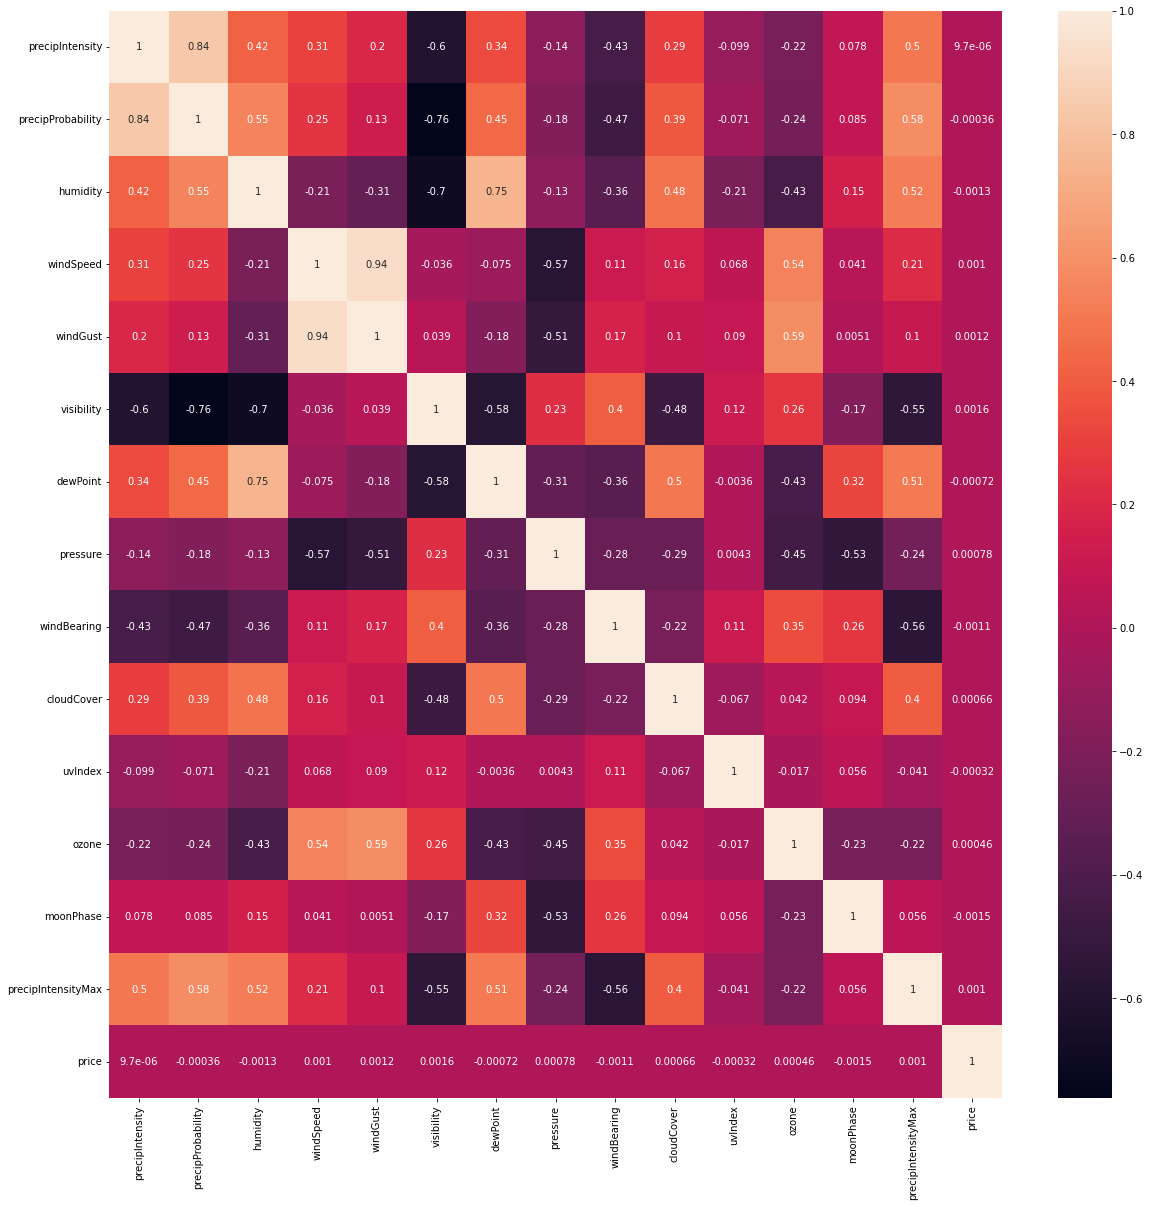

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df_climate.corr(),annot=True)

###  **Temperature Feat With Price**

In [23]:
temp_col = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh', 'surge_multiplier',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [24]:
df_temp = df[temp_col]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,surge_multiplier,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,1.0,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,1.0,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,1.0,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,1.0,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,1.0,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<AxesSubplot:>

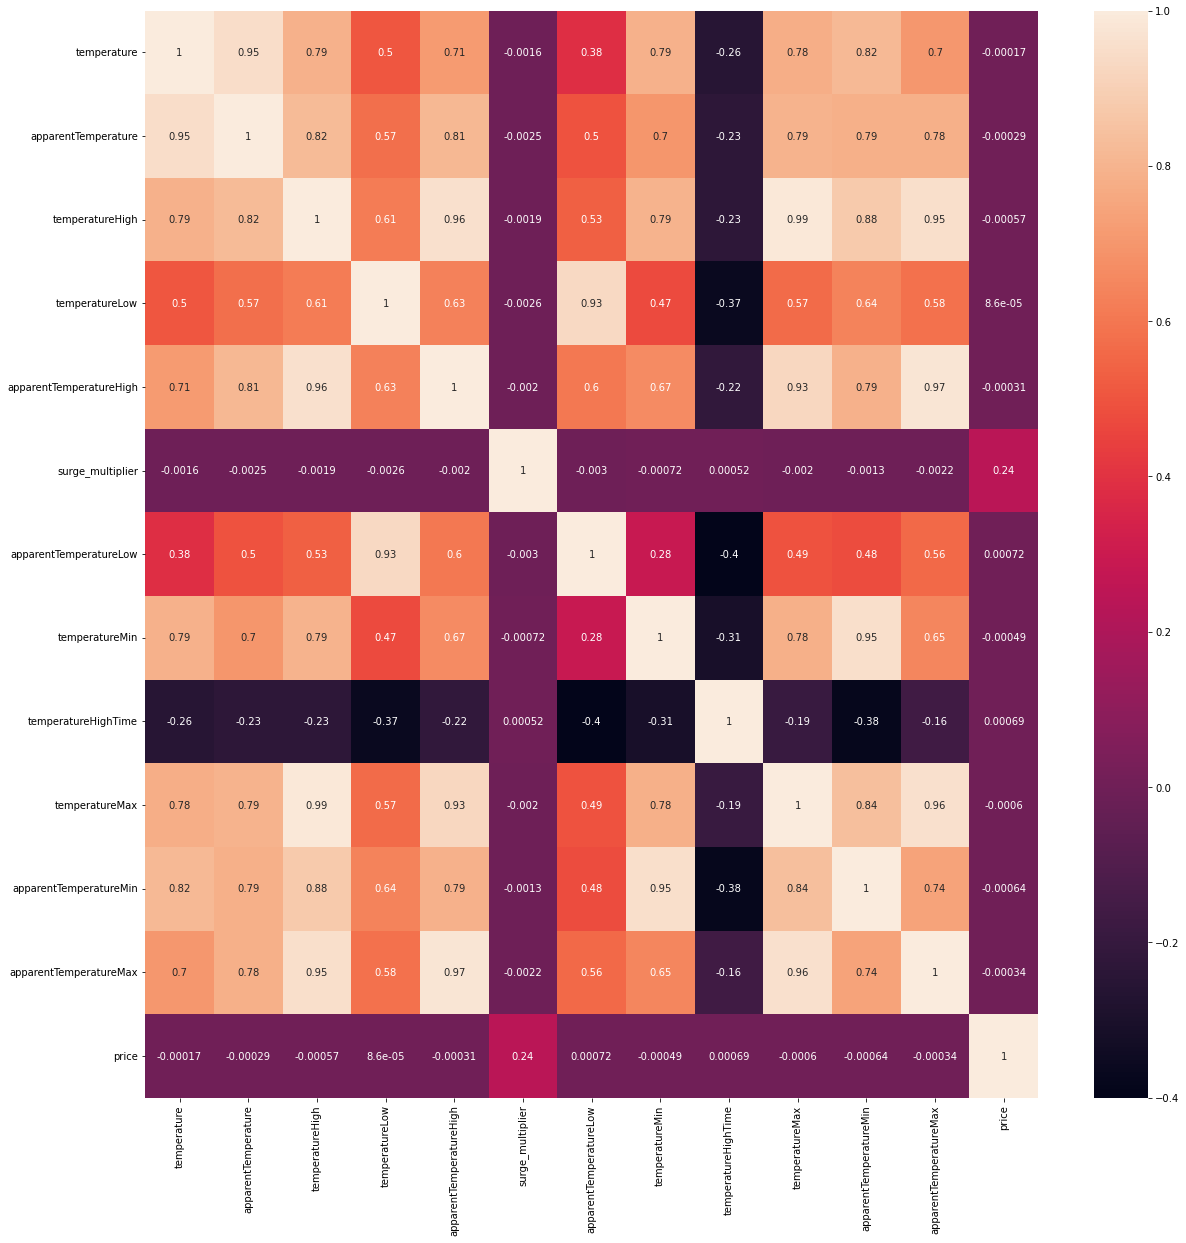

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df_temp.corr(),annot=True)

### **Categorical Feat With Price**

In [26]:
cat_col = ['source', 'destination','cab_type','name','short_summary','icon','price']
df_cat = df[cat_col]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693066,11,6,1,11,6,5,13.0
693067,11,6,1,10,6,5,9.5
693068,11,6,1,8,6,5,13.5
693069,11,6,1,1,6,5,27.0


<AxesSubplot:>

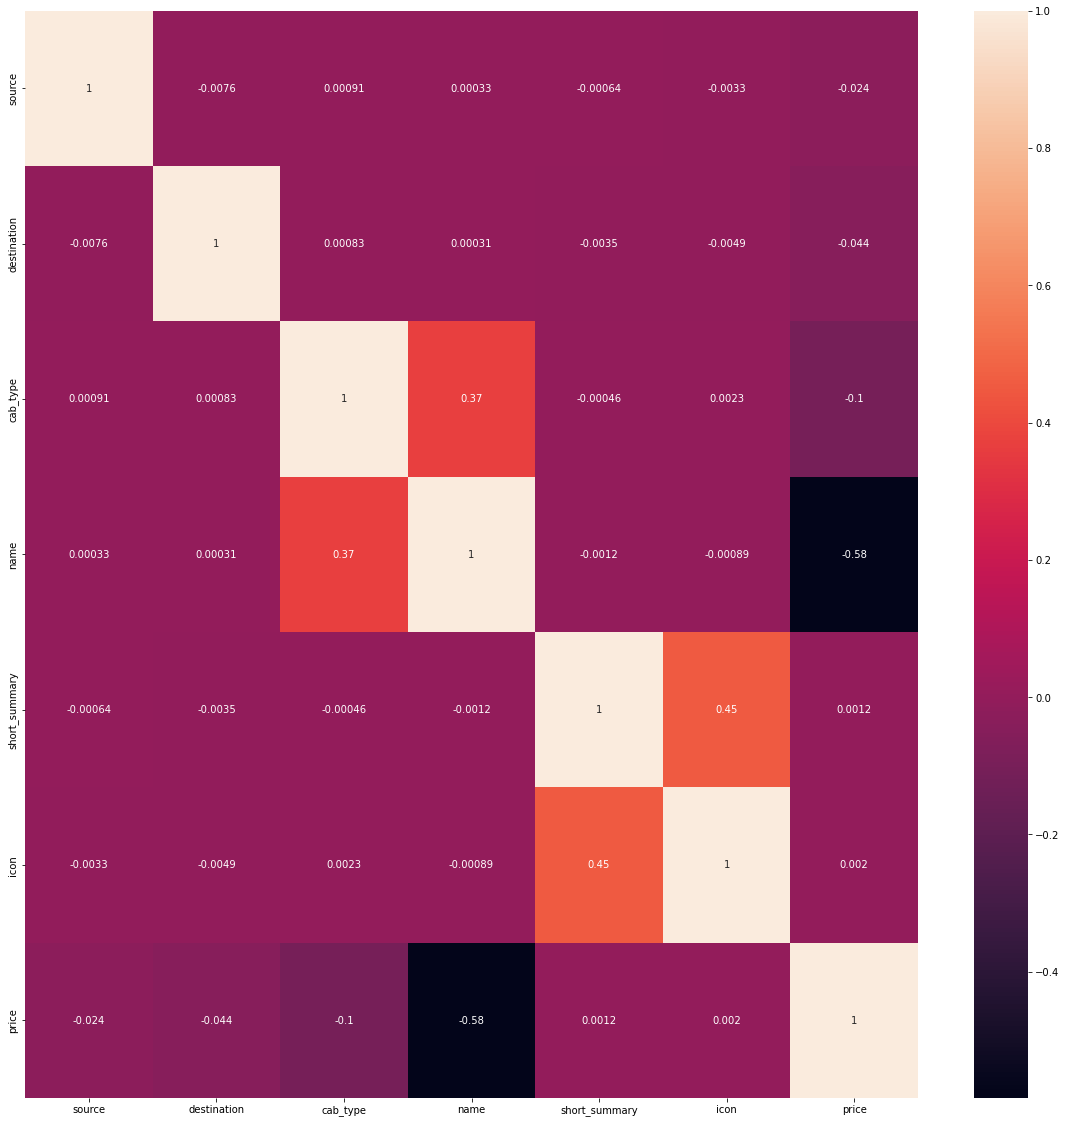

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

# **PENDEFINISIAN MODEL**

## **New Linear Regression**

> Setelah melakukan data preprocessing, selanjutnya menghapus kolom yang tidak memiliki korelasi yang kuat dengan feature price, sehingga tersisa feature cab_type, name, price, distance, dan surge_multiplier

In [29]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime',
                  'precipIntensity', 'precipProbability', 'humidity', 'windSpeed','windGust', 'visibility', 'dewPoint', 
                  'pressure', 'windBearing','cloudCover', 'uvIndex', 'ozone', 'moonPhase','precipIntensityMax','timezone',
                  'product_id','source','destination','short_summary','icon','hour','day','month','latitude','longitude', 
                  'temperature', 'apparentTemperature', 'temperatureHigh','temperatureHighTime', 'temperatureLow', 'apparentTemperatureHigh',
                  'apparentTemperatureLow', 'visibility.1', 'temperatureMin','temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'
                  ],axis=1)

In [30]:
new_df.shape

(693071, 5)

In [31]:
new_df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

###  **Encoding Data**

In [32]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [33]:
new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
    
new_df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [34]:
new_df_onehot.describe()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
count,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,16.303056,2.189430,1.013870,0.443545,0.556455,0.079494,0.079495,0.073925,0.073925,0.073925,0.073925,0.073925,0.073922,0.079494,0.079488,0.079493,0.079495,0.079495
std,8.983913,1.138937,0.091641,0.496803,0.496803,0.270508,0.270511,0.261648,0.261648,0.261648,0.261648,0.261648,0.261644,0.270508,0.270499,0.270506,0.270511,0.270511
min,2.500000,0.020000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.500000,1.280000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.500000,2.160000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.500000,2.920000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.500000,7.860000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Dataset Split**

In [35]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### **Modeling**

In [36]:
# create model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [37]:
print(X)

[[0.44 1.   1.   ... 0.   0.   0.  ]
 [0.44 1.   1.   ... 0.   0.   0.  ]
 [0.44 1.   1.   ... 0.   0.   0.  ]
 ...
 [1.   1.   0.   ... 0.   0.   0.  ]
 [1.   1.   0.   ... 0.   0.   0.  ]
 [1.   1.   0.   ... 0.   0.   0.  ]]


In [38]:
print(y)

[ 5.  11.   7.  ... 13.5 27.  10. ]


In [39]:
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 6.86755371 36.75024414 12.84442139 ...  4.35241699 31.3815918
  2.58929443]


In [40]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.917901196229882
intercept: 376015960755.5017
slope: [ 2.55524454e+00  1.82917783e+01  1.96715794e+12 -1.62045856e+12
  1.24444260e+12  1.24444260e+12 -2.34317390e+12 -2.34317390e+12
 -2.34317390e+12 -2.34317390e+12 -2.34317390e+12 -2.34317390e+12
  1.24444260e+12  1.24444260e+12  1.24444260e+12  1.24444260e+12
  1.24444260e+12]


In [41]:
prediction = model.intercept_ + np.sum(model.coef_*X_train, axis=1)
print('predicted response:', prediction, sep='\n')

predicted response:
[18.25927734 22.76098633 18.43823242 ... 17.95483398 17.12457275
 10.98144531]


In [42]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9185623875729595

In [43]:
# mse score
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

6.588291313112069
2.566766704067993


In [44]:
filename = "linear_model.pkl"
joblib.dump(model, filename)

['linear_model.pkl']

In [45]:
loaded_model = joblib.load(filename)

In [46]:
loaded_model.predict([[0.44, 1.0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

array([10.14874268])

In [47]:
pickle.dump(model, open('regression_model.pkl', 'wb'))